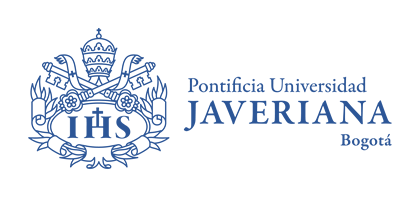

# Introducción a la IA - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Iván Darío Orozco

In [1]:
!pip install -r requirements.txt

In [2]:
!pip install ucimlrepo

# Importar librerías

In [1]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.

# Cargar el dataset

In [2]:
# Se cargan los datos del dataset de vinos desde un archivo CSV.
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# **Paso 2: Comprensión del dataset**

In [3]:
# Información general del dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Estadísticas descriptivas del dataset
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

# **Paso 3: pre procesamiento**

### Tratamiento de valores nulos

In [5]:
# Verificar la existencia de valores nulos (no hay)
print(df_wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


No hay valores nulos en el dataset, por lo que no es necesario realizar el proceso de eliminación de valores nulos.

### Dumificación de variables categóricas

In [6]:
# Se utiliza la función fdfdsfsget_dummies de pandas para convertir la variable categórica 'color' en variables dummy.
df_wine = pd.get_dummies(df_wine, columns=['color'])
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


### Visualización de la matriz de correlación

<Axes: >

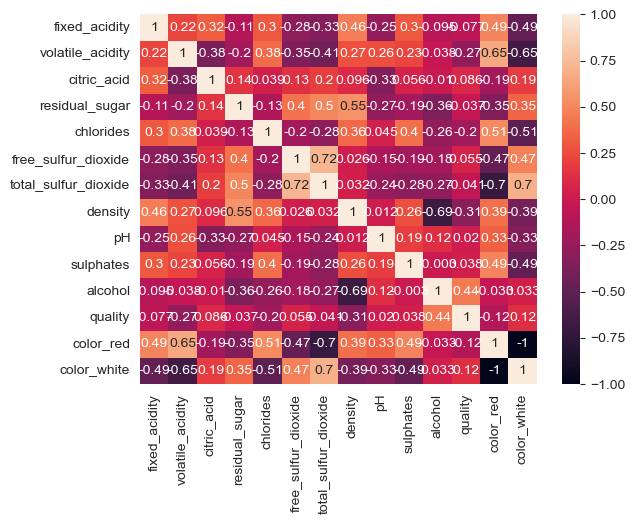

In [7]:
# Se visualiza la matriz de correlación para identificar las relaciones entre las variables.
sns.heatmap(df_wine.corr(), annot=True)

### Tratamiento de valores atípicos

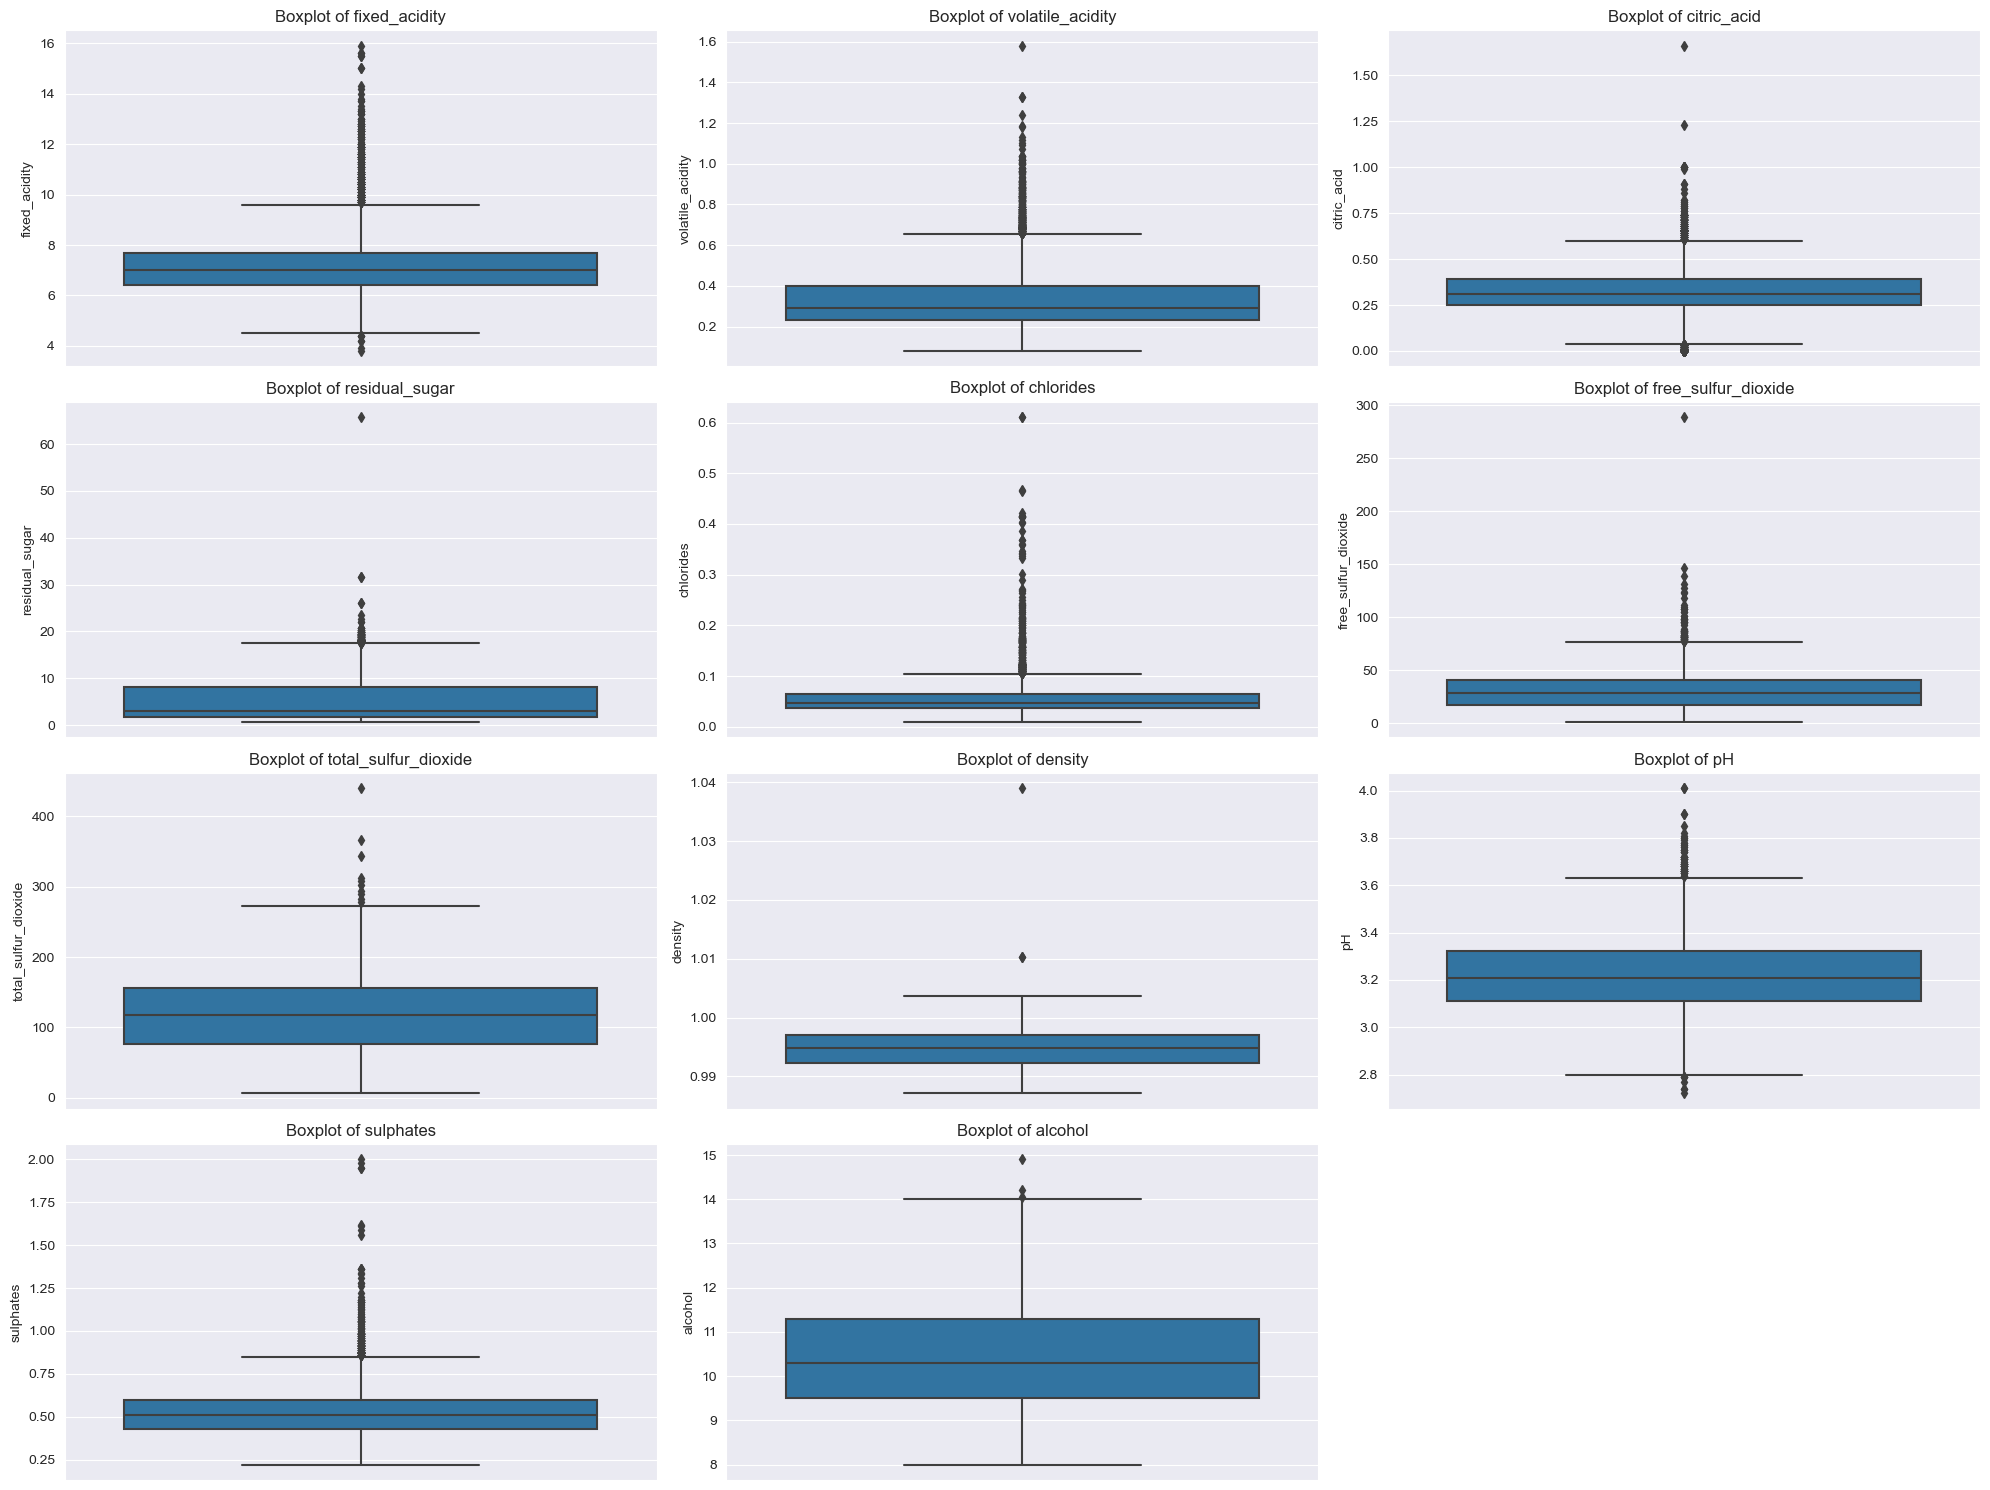

In [8]:
# Se visualizan los datos para identificar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [9]:
# Se eliminan los valores atípicos de las variables.
for column in df_wine.columns[:-1][:11]:
    q1 = df_wine[column].quantile(0.25)
    q3 = df_wine[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_wine = df_wine[(df_wine[column] > lower_bound) & (df_wine[column] < upper_bound)]
    

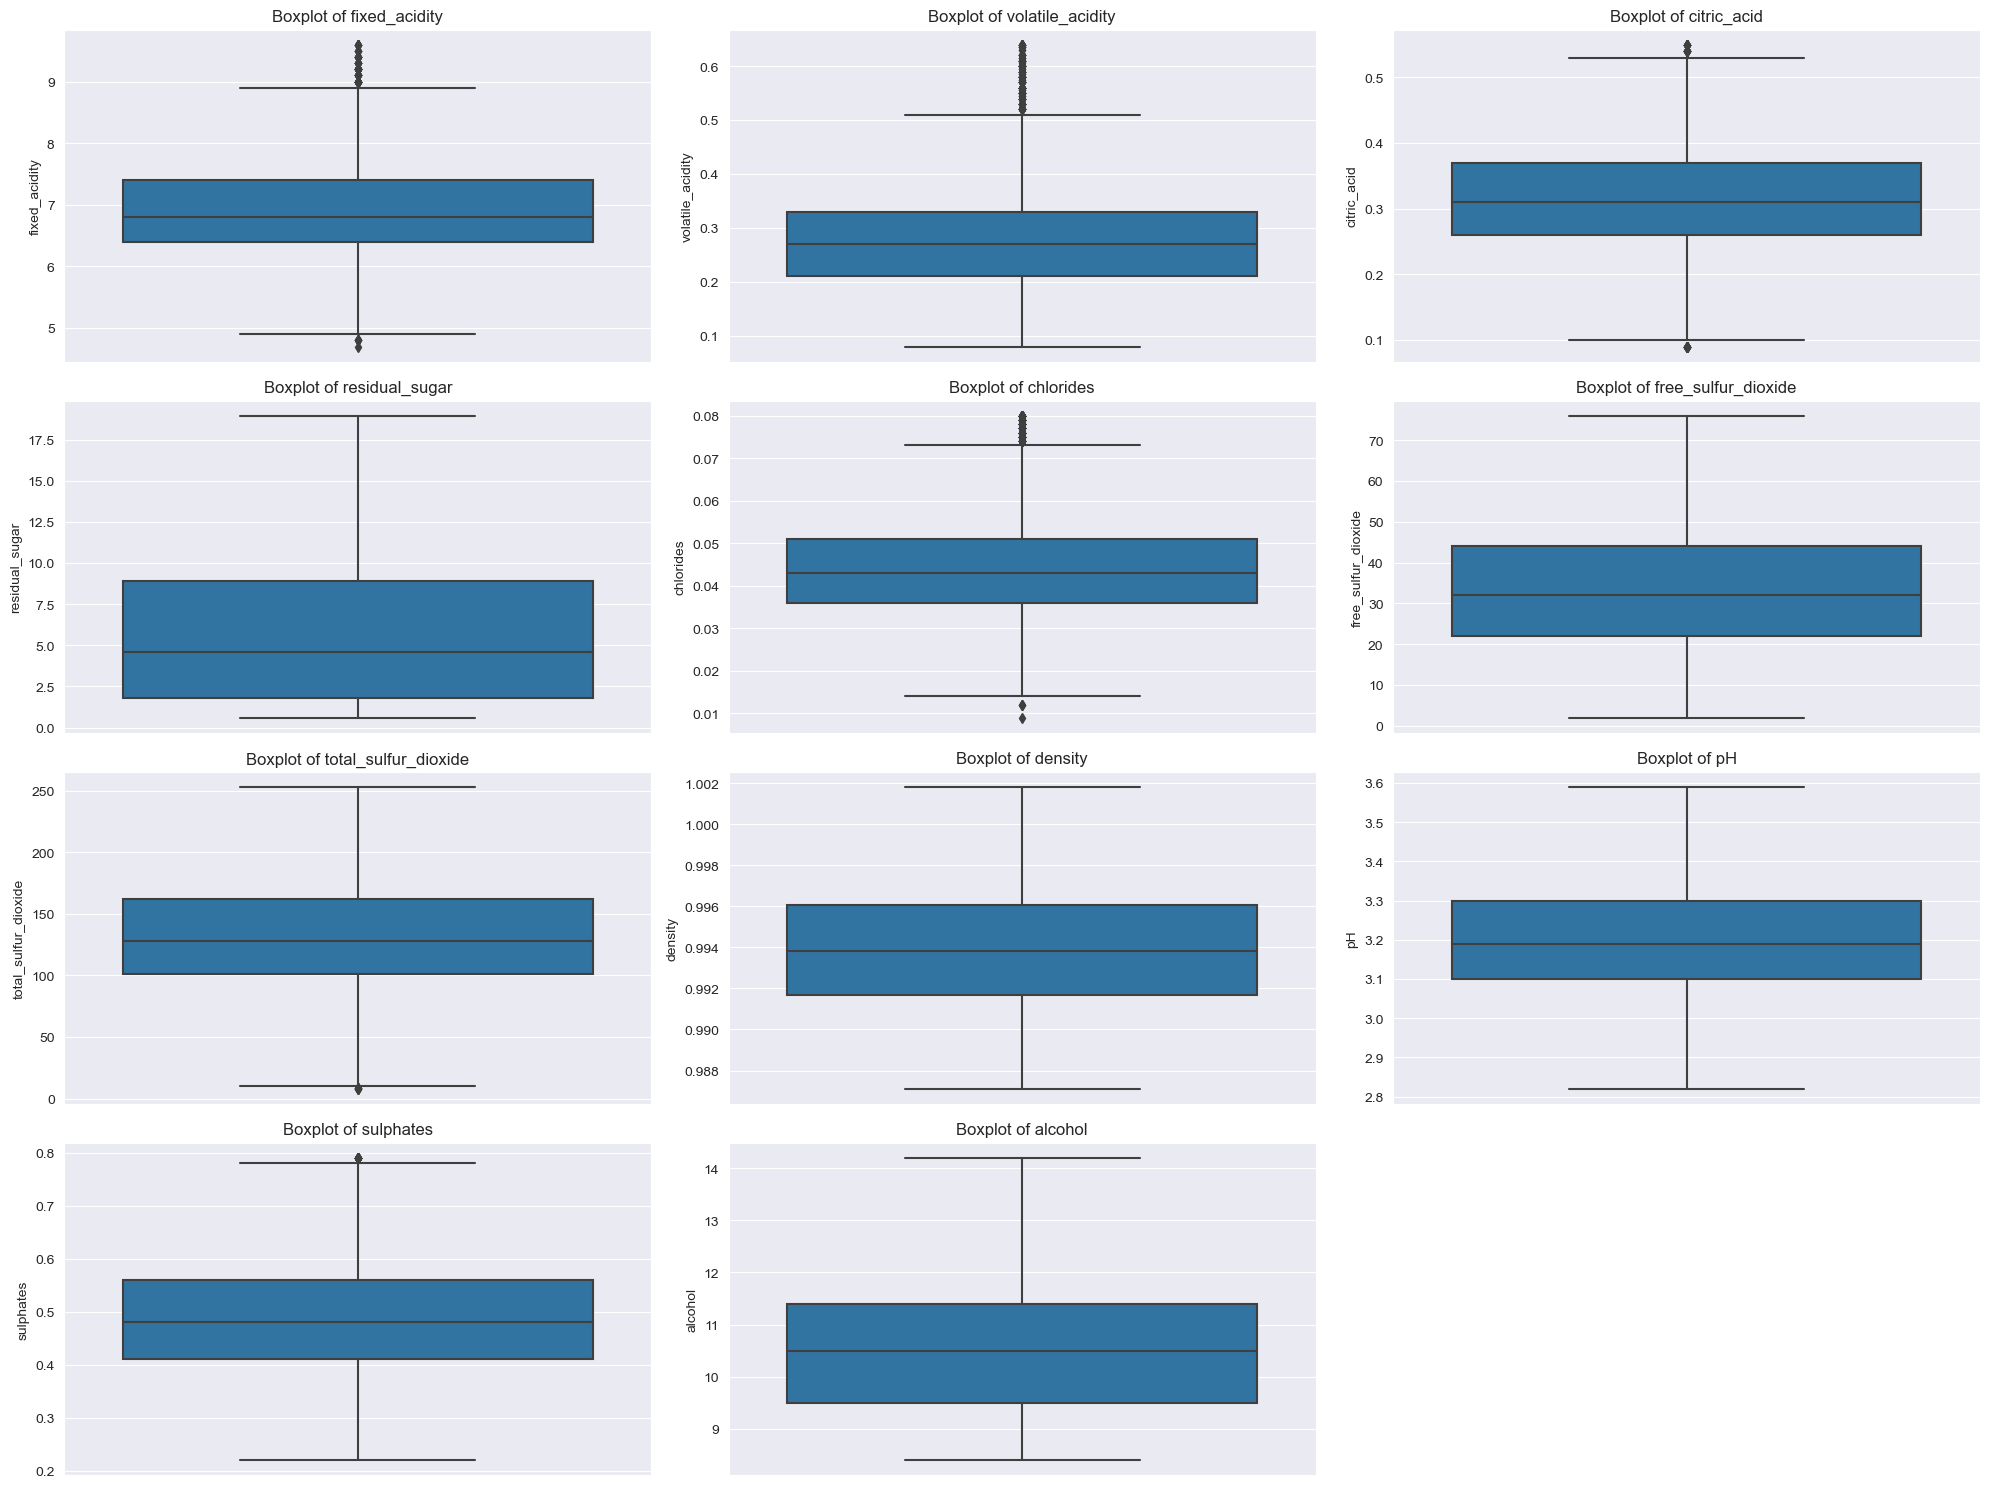

In [10]:
# Se visualizan los datos después de eliminar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:11], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Separación de variables dependientes e independientes

In [11]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de pruebas (80-20)
y_data = df_wine['quality']
X_data = df_wine.drop(columns=['quality'])
# 
X_data_train1, X_data_test1, y_data_train1, y_data_test1 = train_test_split(X_data, y_data, test_size=0.5, random_state=42)
X_data_train2, X_data_test2, y_data_train2, y_data_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_data_train3, X_data_test3, y_data_train3, y_data_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Estandarizar los datos
x_data_train1_scaled = StandardScaler().fit_transform(X_data_train1)
x_data_test1_scaled = StandardScaler().fit_transform(X_data_test1)

x_data_train2_scaled = StandardScaler().fit_transform(X_data_train2)
x_data_test2_scaled = StandardScaler().fit_transform(X_data_test2)

x_data_train3_scaled = StandardScaler().fit_transform(X_data_train3)
x_data_test3_scaled = StandardScaler().fit_transform(X_data_test3)

# **Paso 4: Construcción del modelo**

### Modelo 1: Perceptrón

In [12]:
from sklearn.linear_model import Perceptron

# Crear el modelo
perceptron = Perceptron()

# Entrenar el modelo
perceptron.fit(x_data_train1_scaled, y_data_train1)

Perceptron()

### Modelo 2: Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

### Modelo 3: Red neuronal con dos capas oculta con dos neuronas en cada capa oculta.